Download YOLOv6


In [ ]:
!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt

Cloning into 'YOLOv6'...
remote: Enumerating objects: 2536, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 2536 (delta 294), reused 281 (delta 248), pack-reused 2136
Receiving objects: 100% (2536/2536), 29.15 MiB | 9.12 MiB/s, done.
Resolving deltas: 100% (1482/1482), done.
/content/YOLOv6
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 14.0 MB/s 
     |████████████████████████████████| 2.0 MB 50.9 MB/s 
     |████████████████████████████████| 237 kB 86.2 MB/s 
     |████████████████████████████████| 51 kB 8.5 MB/s 


In [1]:
import torch
torch.cuda.is_available() 
torch.cuda.get_device_name(0)

'Tesla T4'

Unzip data

In [ ]:
!unzip /content/YoloV6_Chess.zip

Archive:  /content/YoloV6_Chess.zip
   creating: images/test/
  inflating: images/test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg  
  inflating: images/test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg  
  inflating: images/test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg  
  inflating: images/test/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54da23469189070a075.jpg  
  inflating: images/test/4e3117459d759798537eb52cf5bf534d_jpg.rf.ec961b62d4b0e131fae760ed1f80836b.jpg  
  inflating: images/test/5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.9dbdb057f6533c0c09c0eda0747fbc9e.jpg  
  inflating: images/test/654bb8835258b26c466b1c19893df451_jpg.rf.55fb7f23a4422a80793f01e152fabe4d.jpg  
  inflating: images/test/685b860d412b91f5d4f7f9e643b84452_jpg.rf.2d78193e4021ae5ffb49ecd1060bebd7.jpg  
  inflating: images/test/73a38a5c8f8f1b09f093f304660d5326_jpg.rf.65192fc4204952bfd1121ee212aade1e.jpg  
  

Train

In [ ]:
!python tools/train.py --batch 32 --conf /content/YOLOv6/configs/yolov6m.py --epochs 100 --img-size 416 --data /content/YOLOv6/data.yaml --device 0 

Using 1 GPU for training... 
training args are: Namespace(batch_size=32, calib=False, check_images=False, check_labels=False, conf_file='/content/YOLOv6/configs/yolov6m.py', data_path='/content/YOLOv6/data.yaml', device='0', dist_url='env://', distill=False, distill_feat=False, epochs=100, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=416, local_rank=-1, name='exp', output_dir='./runs/train', quant=False, rank=-1, resume=False, save_ckpt_on_last_n_epoch=-1, save_dir='runs/train/exp1', stop_aug_last_n_epoch=15, teacher_model_path=None, temperature=20, workers=8, world_size=1, write_trainbatch_tb=False)

Train: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 606/606 [00:00<00:00, 3656.57it/s]
Train: Checking formats of labels with 2 process(es): 
606 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 606/606 [00:00<00:00, 2856.50it/s]
Train: Final numbers of valid images: 606/ labels: 606. 
0.

Evaluation

In [ ]:
!python tools/eval.py --data /content/YOLOv6/data.yaml --img-size 416 --weights /content/YOLOv6/runs/train/exp1/weights/best_ckpt.pt --device 0 

Namespace(batch_size=32, conf_thres=0.03, config_file='', data='/content/YOLOv6/data.yaml', device='0', do_coco_metric=True, do_pr_metric=False, eval_config_file='./configs/experiment/eval_640_repro.py', force_no_pad=False, half=False, img_size=416, iou_thres=0.65, letterbox_return_int=False, name='exp', not_infer_on_rect=False, plot_confusion_matrix=False, plot_curve=True, reproduce_640_eval=False, save_dir='runs/val/', scale_exact=False, task='val', test_load_size=640, verbose=False, weights='/content/YOLOv6/runs/train/exp1/weights/best_ckpt.pt')
Loading checkpoint from /content/YOLOv6/runs/train/exp1/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model 

Test

In [ ]:
!python tools/infer.py --weights /content/YOLOv6/runs/train/exp1/weights/best_ckpt.pt --source /content/YOLOv6/images/test --yaml /content/YOLOv6/data.yaml --device 0 

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/images/test', view_img=False, weights='/content/YOLOv6/runs/train/exp1/weights/best_ckpt.pt', yaml='/content/YOLOv6/data.yaml')
Save directory already existed
Loading checkpoint from /content/YOLOv6/runs/train/exp1/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 29/29 [00:01<00:00, 25.68it/s]
Results saved to runs/inference/exp


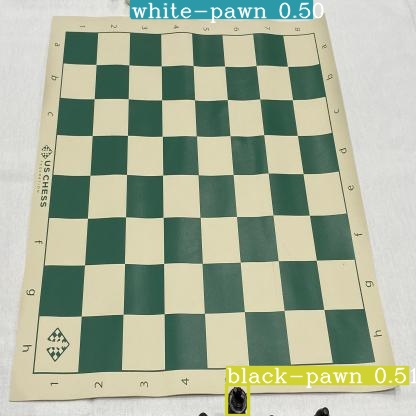

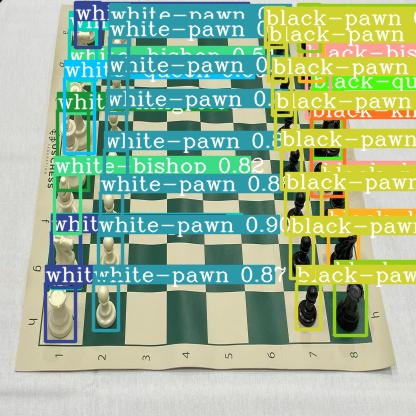

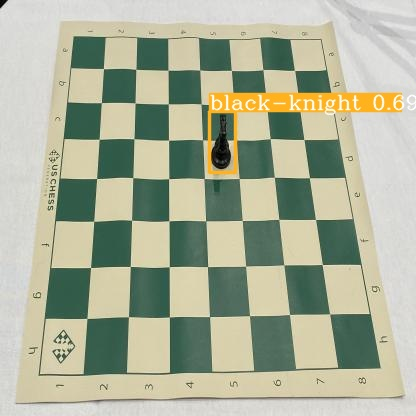

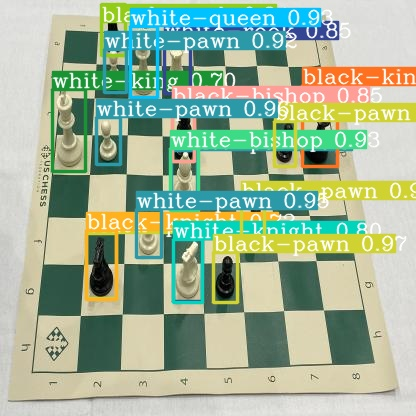

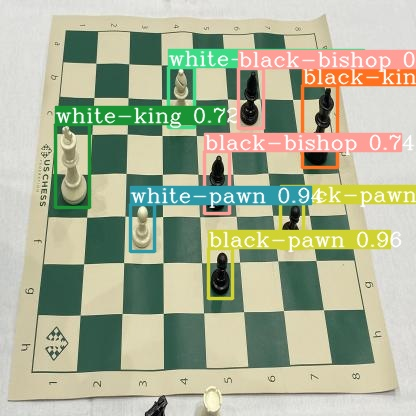

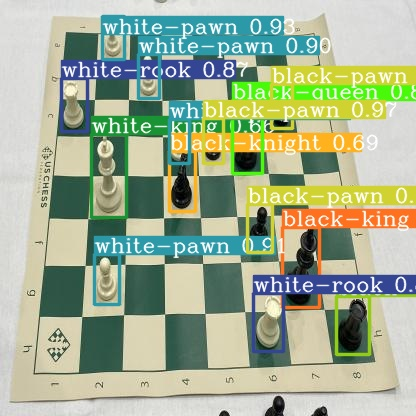

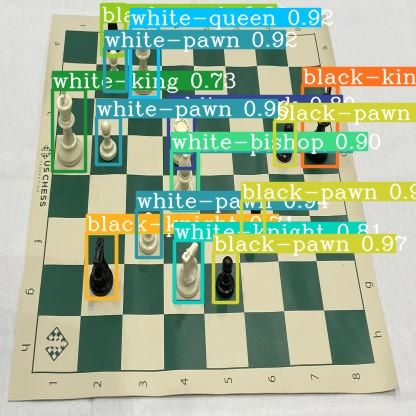

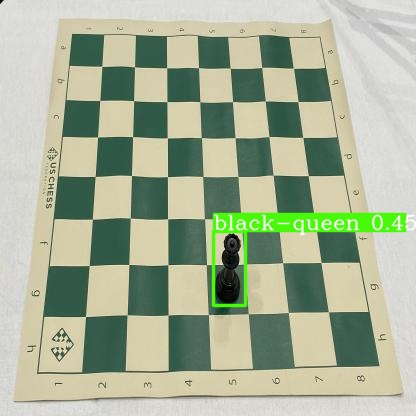

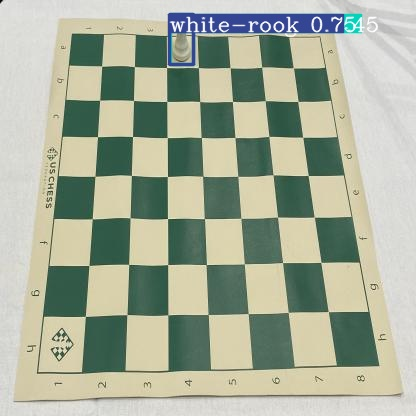

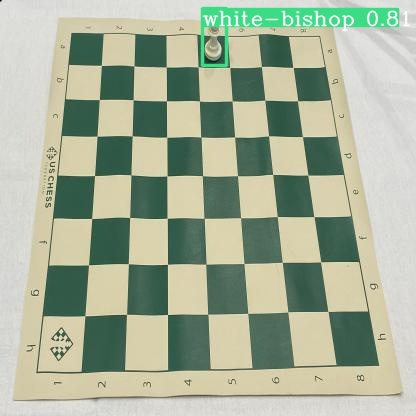

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/YOLOv6/runs/inference/exp/test/*.jpg'):
      display(Image(filename=imageName))